In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # Suppress Deprecation and Incorrect Usage Warnings
warnings.filterwarnings('ignore')

In [13]:
response = pd.read_csv("multipleChoiceResponses.csv",encoding="ISO-8859-1", low_memory=False)
response.shape

(16716, 228)

In [14]:
response.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Exploratory Analysis

In [15]:
print('The total number of respondents:',response.shape[0])
print('Total number of Countries with respondents:',response['Country'].nunique())
print('Country with highest respondents:',response['Country'].value_counts().index[0])
print('Youngest respondent:',response['Age'].min(),' and Oldest respondent:',response['Age'].max())

The total number of respondents: 16716
Total number of Countries with respondents: 52
Country with highest respondents: United States
Youngest respondent: 0.0  and Oldest respondent: 100.0


> We can say there is **something wrong with age**. it's needed to be rearranged properly

### 1.1 Gender

In [16]:
response['GenderSelect'].value_counts()

Male                                                 13610
Female                                                2778
A different identity                                   159
Non-binary, genderqueer, or gender non-conforming       74
Name: GenderSelect, dtype: int64

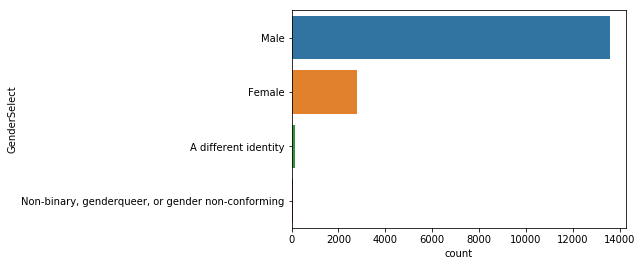

In [17]:
plt.subplots()
sns.countplot(y=response['GenderSelect'],order=response['GenderSelect'].value_counts().index)
plt.show()

### 1.2 Country

In [18]:
response['Country'].value_counts().head(10)

United States                  4197
India                          2704
Other                          1023
Russia                          578
United Kingdom                  535
People 's Republic of China     471
Brazil                          465
Germany                         460
France                          442
Canada                          440
Name: Country, dtype: int64

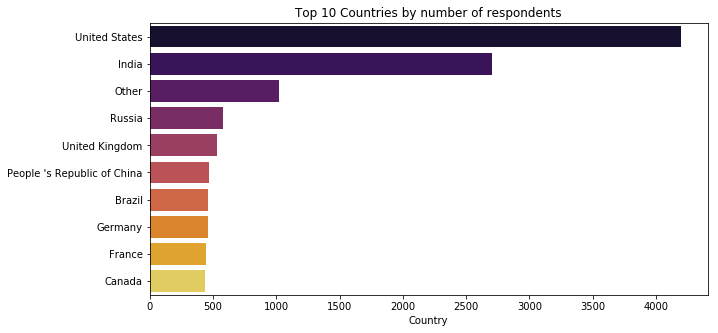

In [19]:
response_coun=response['Country'].value_counts()[:10].to_frame()
sns.barplot(response_coun['Country'],response_coun.index,palette='inferno')
plt.title("Top 10 Countries by number of respondents")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()


### 1.3 Salary

#### Conversion from different currenty to USD

In [20]:
response['CompensationAmount']=response['CompensationAmount'].str.replace(',','')
response['CompensationAmount']=response['CompensationAmount'].str.replace('-','')

rates=pd.read_csv('conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)
salary=response[['CompensationAmount','CompensationCurrency','GenderSelect','Country','CurrentJobTitleSelect']].dropna()
salary=salary.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
salary['Salary']=pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']
print('Maximum Salary is USD $',salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


Salary column is need to be rearragend by IsNull but this time, I will use just **median** due to lack of time :(

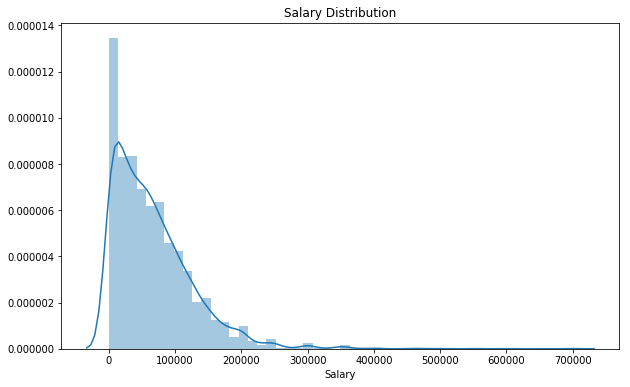

In [21]:
plt.subplots(figsize=(10,6))
salary=salary[salary['Salary']<1000000]
sns.distplot(salary['Salary'])
plt.title('Salary Distribution')
plt.show()

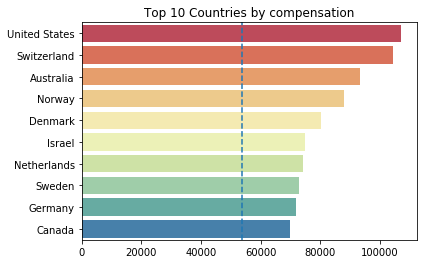

In [22]:
sal_coun=salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:10].to_frame()
sns.barplot(sal_coun['Salary'],sal_coun.index,palette="Spectral")
plt.axvline(salary['Salary'].median(),linestyle='dashed')
plt.title('Top 10 Countries by compensation')
plt.xlabel('')
plt.ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

> ### 1.4 Job Title & Major

In [23]:
jbttl_df = pd.DataFrame(response['CurrentJobTitleSelect'].value_counts())
jbttl_df['Ratio'] = pd.DataFrame(response['CurrentJobTitleSelect'].value_counts(normalize=True))
jbttl_df.head(10)

,CurrentJobTitleSelect,Ratio
Data Scientist,2433,0.205664
Software Developer/Software Engineer,1759,0.148690
Other,1233,0.104227
Data Analyst,1213,0.102536
Scientist/Researcher,978,0.082671
Business Analyst,796,0.067287
Researcher,619,0.052325
Machine Learning Engineer,617,0.052156
Engineer,552,0.046661
Programmer,462,0.039053


In [24]:
major_df = pd.DataFrame(response['MajorSelect'].value_counts())
major_df['Ratio'] = pd.DataFrame(response['MajorSelect'].value_counts(normalize=True))
major_df.head(10)

,MajorSelect,Ratio
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


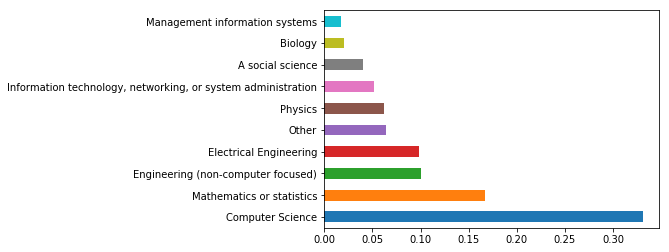

In [25]:
major_df['Ratio'][:10].plot(kind='barh')

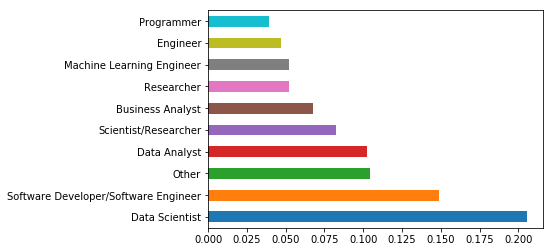

In [26]:
jbttl_df['Ratio'][:10].plot(kind='barh')

> ### 1.5 Experienced period for Programming 

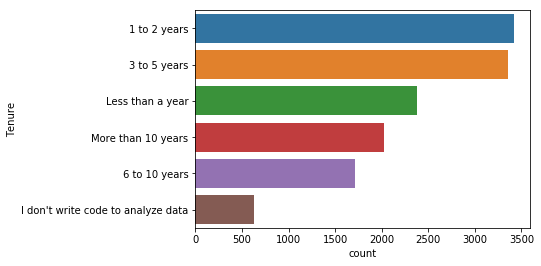

In [27]:
sns.countplot(y='Tenure', data=response, order=response['Tenure'].value_counts().index)

## 2. Requirements to become a Data scientist

> ### 2.1 Recommeded Degree 


In [28]:
edu_df = pd.DataFrame(response['FormalEducation'].value_counts())
edu_df['Ratio'] = pd.DataFrame(response['FormalEducation'].value_counts(normalize=True))
edu_df.head()

,FormalEducation,Ratio
Master's degree,6273,0.417782
Bachelor's degree,4811,0.320413
Doctoral degree,2347,0.156310
Some college/university study without earning a bachelor's degree,786,0.052348
Professional degree,451,0.030037


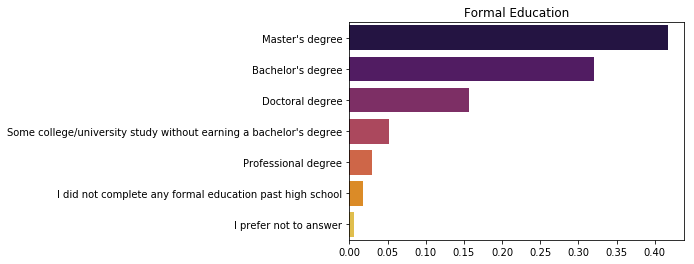

In [29]:
sns.barplot(edu_df['Ratio'],edu_df['Ratio'].index,palette='inferno')
plt.title("Formal Education")
plt.xlabel('')
plt.ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

In total, Master and Ph.D degree is mainly(around 73%) composed of education level <br/>
** For the importance of degree, we need to dig into 'JobSkillImportanceDegree' column **

> ### 2.2 Recommended Skills

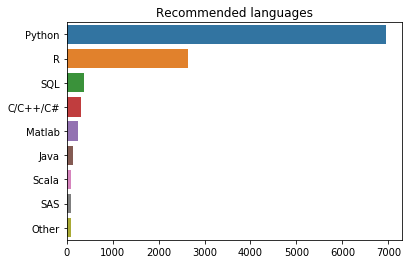

In [30]:
sns.countplot(y='LanguageRecommendationSelect', data=response, order=response['LanguageRecommendationSelect'].value_counts()[:9].index)
plt.title("Recommended languages")
plt.xlabel('')
plt.ylabel('')
plt.show()

> ### 2.3 Importance of Algorithm / Stats / ML

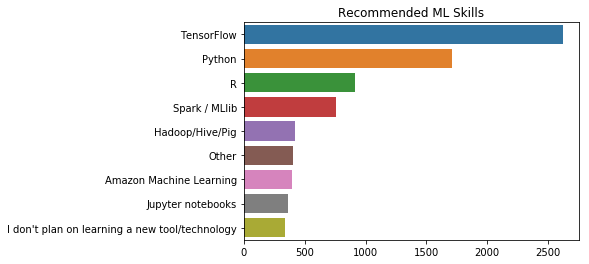

In [31]:
sns.countplot(y='MLToolNextYearSelect', data=response, order=response['MLToolNextYearSelect'].value_counts()[:9].index)
plt.title("Recommended ML Skills")
plt.xlabel('')
plt.ylabel('')
plt.show()

> ### 2.4 Importance of Algorithms 

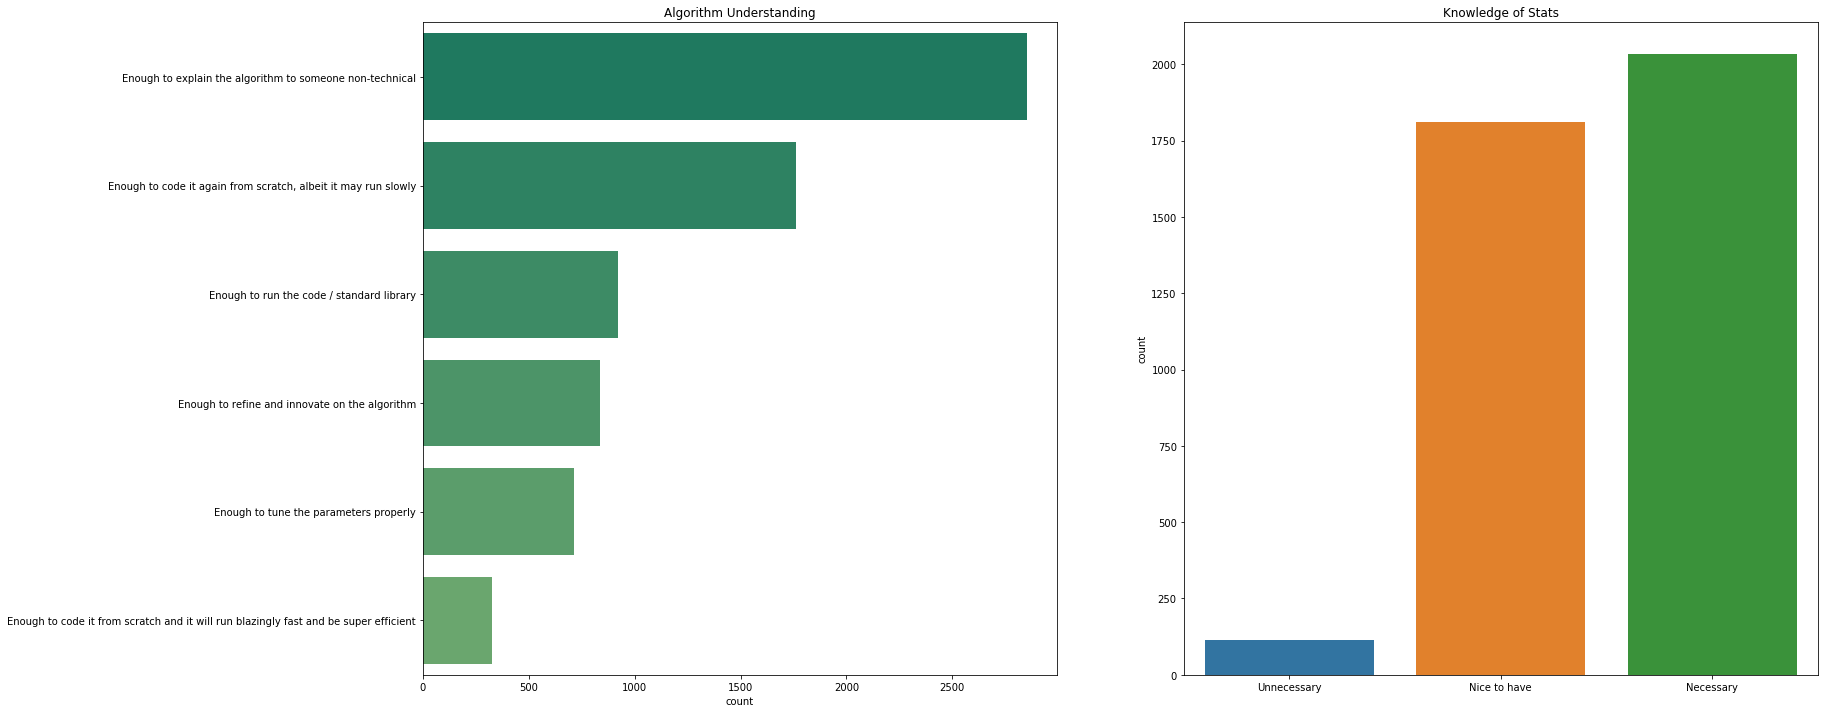

In [32]:
f,ax=plt.subplots(1,2,figsize=(25,12))
sns.countplot(y=response['AlgorithmUnderstandingLevel'],order=response['AlgorithmUnderstandingLevel'].value_counts().index,ax=ax[0],palette=sns.color_palette('summer',15))
sns.countplot(response['JobSkillImportanceStats'],ax=ax[1])
ax[0].set_title('Algorithm Understanding')
ax[0].set_ylabel('')
ax[1].set_title('Knowledge of Stats')
ax[1].set_xlabel('')
plt.show()

> ### 2.5 Recommended Learning platform

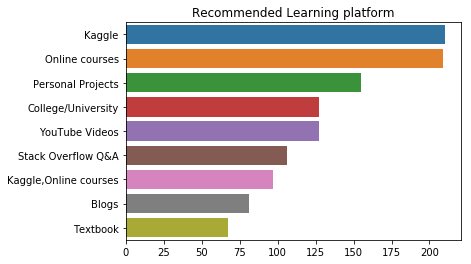

In [33]:
sns.countplot(y='LearningPlatformSelect', data=response, order=response['LearningPlatformSelect'].value_counts()[:9].index)
plt.title("Recommended Learning platform")
plt.xlabel('')
plt.ylabel('')
plt.show()

## 3. Job searching

> ### 3.1 The way to prove knowledge for Data scientist

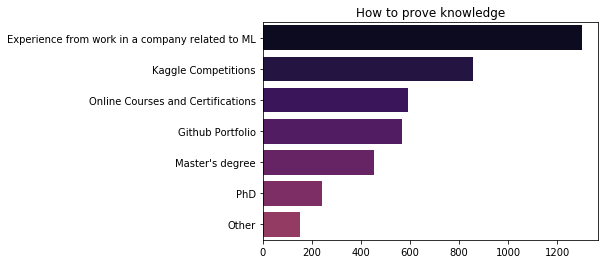

In [34]:
sns.countplot(y=response['ProveKnowledgeSelect'],order=response['ProveKnowledgeSelect'].value_counts().index,palette=sns.color_palette('inferno',15))
plt.xlabel('')
plt.ylabel('')
plt.title('How to prove knowledge')
plt.show()

> ### 3.2 Job searching Method

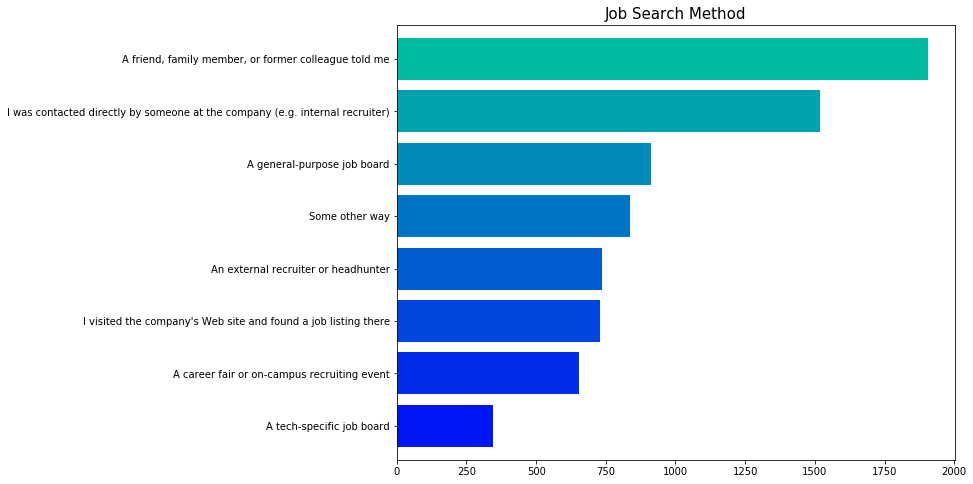

In [35]:
plt.subplots(figsize=(10,8))
response.groupby(['EmployerSearchMethod'])['Age'].count().sort_values(ascending=True).plot.barh(width=0.8,color=sns.color_palette('winter',10))
plt.title('Job Search Method',size=15)
plt.ylabel('')
plt.show()

## 4. Conclusion

> * Required relevant skills of Data Science : Python > R > SQL. When it comes to ML, Tensorflow is the most important skill. Those skills are considered essential skills and It is needed to be digging into for the importance of each skill.
* Statistics and Algorithm are also important, especially Statistics, people prefer self-learning platform to degree program. It might be said that the importance of degree might is not true. Kaggle, Individual project and Online course can be appealed to the industry.
* When we are joining to company, Relevaent experience > Submission on Kaggle > Online course Certification  > Degree(Master/Ph.D) > Portpolio on Github. Many of respondents tend to apply for job vacancy through network. This results, of course, that limit to Job market in US.

### Limitation
* More elaborate Data cleaning is needed due to Null value. 
* For more detailed analysis and insights, each analysis depeds on various sectors like Age/Nation/Gender/Industry are required.